In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df = df.drop('id', axis = 1)

In [5]:
df.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


In [6]:
dfs = []
import re
for i in df['tweet']:
    ns = re.sub(r"[^a-zA-Z0-9]"," ",i)
    rns = re.sub(r"user"," ",ns)
    dfs.append(rns)


In [7]:
dfs

['    when a father is dysfunctional and is so selfish he drags his kids into his dysfunction     run',
 '      thanks for  lyft credit i can t use cause they don t offer wheelchair vans in pdx      disapointed  getthanked',
 '  bihday your majesty',
 ' model   i love u take with u all the time in ur                                      ',
 ' factsguide  society now     motivation',
 ' 2 2  huge fan fare and big talking before they leave  chaos and pay disputes when they get there   allshowandnogo  ',
 '    camping tomorrow                      danny   ',
 'the next school year is the year for exams      can t think about that       school  exams    hate  imagine  actorslife  revolutionschool  girl',
 'we won    love the land     allin  cavs  champions  cleveland  clevelandcavaliers      ',
 '       welcome here    i m   it s so  gr8   ',
 '      ireland consumer price index  mom  climbed from previous 0 2  to 0 5  in may    blog  silver  gold  forex',
 'we are so selfish   orlando  st

In [8]:
df_new = {'new tweet': dfs}
df_t = pd.DataFrame(df_new)

In [9]:
df_t

,new tweet
0,when a father is dysfunctional and is so s...
1,thanks for lyft credit i can t use caus...
2,bihday your majesty
3,model i love u take with u all the time in ...
4,factsguide society now motivation
...,...
31957,ate isz that youuu ...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,sikh temple vandalised in in calgary w...


In [10]:
dfs = pd.concat([df, df_t], axis = 1)

In [11]:
dfs = dfs.drop('tweet', axis = 1)

In [12]:
dfs

,label,new tweet
0,0,when a father is dysfunctional and is so s...
1,0,thanks for lyft credit i can t use caus...
2,0,bihday your majesty
3,0,model i love u take with u all the time in ...
4,0,factsguide society now motivation
...,...,...
31957,0,ate isz that youuu ...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,sikh temple vandalised in in calgary w...


In [13]:
neg_tweet = ''.join(dfs[dfs['label'] == 1]['new tweet'])
pos_tweet = ''.join(dfs[dfs['label'] == 0]['new tweet'])

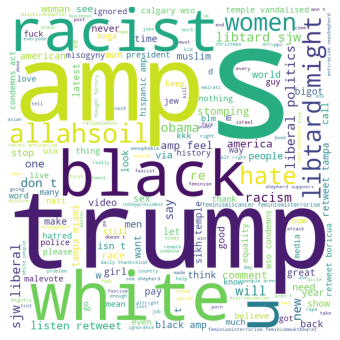

In [14]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(neg_tweet)

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

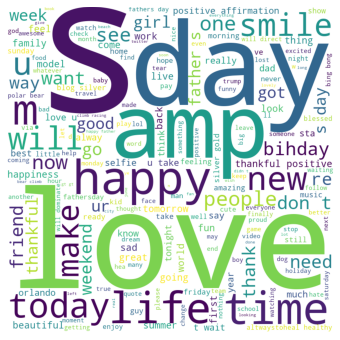

In [15]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(pos_tweet)

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [16]:
X = dfs['new tweet']
y = dfs['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [18]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [19]:
# tfidf

tf = TfidfVectorizer(stop_words="english")

X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

In [25]:
y_train.value_counts()

0    20780
1     1593
Name: label, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()
X_resample_tf, y_resampled_tf = oversample.fit_resample(X_train_tf, y_train)

In [26]:
y_resampled_tf.value_counts()

0    20780
1    20780
Name: label, dtype: int64

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_resample_tf, y_resampled_tf)

DecisionTreeClassifier()

In [23]:
y_pred = dt.predict(X_test_tf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8940
           1       0.60      0.56      0.58       649

    accuracy                           0.94      9589
   macro avg       0.78      0.77      0.78      9589
weighted avg       0.94      0.94      0.94      9589

